<a href="https://colab.research.google.com/github/Jlokkerbol/masterclass/blob/main/Importing_and_exploring_crime_outcome_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting Crime data from Statistics Netherlands

This notebook shows you how to extract data from Statistics Netherlands and explore aspects of this data

In [1]:
# install the module that connects with the Statistics Netherlands API
# https://www.cbs.nl/nl-nl/onze-diensten/open-data/hulpmiddel-voor-het-gebruik-van-odata-in-r-en-python
!pip install cbsodata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# import / activate the relevant modules
import pandas as pd
import cbsodata

In [3]:
# download table of contents with the available tables at CBS and show first 10 entries
toc = pd.DataFrame(cbsodata.get_table_list())
toc.head(10)

,Updated,ID,Identifier,Title,ShortTitle,ShortDescription,Summary,Modified,MetaDataModified,ReasonDelivery,...,Period,SummaryAndLinks,ApiUrl,FeedUrl,DefaultPresentation,DefaultSelection,GraphTypes,RecordCount,ColumnCount,SearchPriority
0,2021-11-01T02:00:00,0,84669NED,Banen van werknemers; internationaliseringsken...,Banen; internationalisering bedrijven,\nDeze tabel bevat informatie over werknemersb...,"werknemersbanen, voltijdequivalenten, arbeidsv...",2020-12-14T02:00:00,2021-11-01T02:00:00,Stopgezet,...,2010 t/m 2018,"werknemersbanen, voltijdequivalenten, arbeidsv...",https://opendata.cbs.nl/ODataApi/OData/84669NED,https://opendata.cbs.nl/ODataFeed/OData/84669NED,ts=1606984891185&graphtype=Table&r=Internation...,$filter=((BedrijfstakkenBranchesSBI2008 eq 'T0...,"Table,Bar,Line",304128,10,1
1,2021-11-05T02:00:00,1,83583NED,Banen van werknemers; bedrijfsgrootte en econo...,Banen van werknemers; bedrijfsgrootte,\nDeze tabel geeft informatie over het gemidde...,Gemiddeld aantal banen van werknemers in decem...,2021-11-05T02:00:00,2021-11-05T02:00:00,Actualisering,...,2010 december - 2020 december,Gemiddeld aantal banen van werknemers in decem...,https://opendata.cbs.nl/ODataApi/OData/83583NED,https://opendata.cbs.nl/ODataFeed/OData/83583NED,"ts=1635771190489&graphtype=Table&r=Perioden,Be...",$filter=((BedrijfstakkenBranchesSBI2008 eq 'T0...,"Table,Bar,Line",8184,4,2
2,2021-11-05T02:00:00,2,83582NED,Banen van werknemers in december; economische ...,"Banen van werknemers; SBI2008, regio",\nDeze tabel geeft informatie over het gemidde...,"Gemiddeld aantal banen werknemers in december,...",2021-11-05T02:00:00,2021-11-05T02:00:00,Actualisering,...,2010-2020,"Gemiddeld aantal banen werknemers in december,...",https://opendata.cbs.nl/ODataApi/OData/83582NED,https://opendata.cbs.nl/ODataFeed/OData/83582NED,ts=1635768991535&graphtype=Table&r=Bedrijfstak...,$filter=((BedrijfstakkenBranchesSBI2008 eq 'T0...,"Table,Map",172480,4,3
3,2022-01-21T02:00:00,3,83628NED,Banen van werknemers naar woon- en werkregio,Woon-werkafstand werknemers; regio,\nDeze tabel brengt het aantal banen van werkn...,"Banen van werknemers, woonregio, werkregio\nBa...",2022-01-21T02:00:00,2022-01-21T02:00:00,Actualisering,...,2014-2020,"Banen van werknemers, woonregio, werkregio<br ...",https://opendata.cbs.nl/ODataApi/OData/83628NED,https://opendata.cbs.nl/ODataFeed/OData/83628NED,"ts=1642524267970&graphtype=Table&r=WoonregioS,...",$filter=((WoonregioS eq 'NL01 ') or (Woonregi...,"Table,Bar,Map",1586032,5,2
4,2022-01-21T02:00:00,4,83658NED,"Banen van werknemers; geslacht, leeftijd, woon...","Woon-werkafstand; geslacht, leeftijd",\nDeze tabel brengt het aantal banen van werkn...,"Banen van werknemers naar geslacht, leeftijd, ...",2022-01-21T02:00:00,2022-01-21T02:00:00,Actualisering,...,2014-2020,"Banen van werknemers naar geslacht, leeftijd, ...",https://opendata.cbs.nl/ODataApi/OData/83658NED,https://opendata.cbs.nl/ODataFeed/OData/83658NED,"ts=1642510021931&graphtype=Table&r=WoonregioS,...",$filter=((Geslacht eq 'T001038')) and ((Leefti...,"Table,Bar,Map",1270500,7,2
5,2021-11-12T02:00:00,5,84826NED,Ontslagen werknemers door faillissement; gesla...,Ontslagen werknemers door faillissement,\nDeze tabel bevat cijfers over het aantal wer...,"ontslagen werknemers\ngeslacht, leeftijd, bedr...",2021-11-12T02:00:00,2021-11-12T02:00:00,Actualisering,...,2015-2019,"ontslagen werknemers<br />geslacht, leeftijd, ...",https://opendata.cbs.nl/ODataApi/OData/84826NED,https://opendata.cbs.nl/ODataFeed/OData/84826NED,ts=1634627130236&graphtype=Table&r=Bedrijfstak...,$filter=((Geslacht eq 'T001038')) and ((Leefti...,"Table,Bar,Line",1860,5,2
6,2020-03-13T02:00:00,6,83257NED,Instromers flexibele schil; baan- en bedrijfsk...,"Flexibele schil;bedr.kenmerken,2007-2017",\nDeze tabel bevat gegevens over het aantal pe...,"Flexibele schil, flexibele arbeid, flexibele b...",2019-10-24T02:00:00,2020-03-13T02:00:00,Stopgezet,...,2007-2017,"Flexibele schil, flexibele arbeid, flexibele b...",ht

In [4]:
# show all columns
toc.columns

Index(['Updated', 'ID', 'Identifier', 'Title', 'ShortTitle',
       'ShortDescription', 'Summary', 'Modified', 'MetaDataModified',
       'ReasonDelivery', 'ExplanatoryText', 'OutputStatus', 'Source',
       'Language', 'Catalog', 'Frequency', 'Period', 'SummaryAndLinks',
       'ApiUrl', 'FeedUrl', 'DefaultPresentation', 'DefaultSelection',
       'GraphTypes', 'RecordCount', 'ColumnCount', 'SearchPriority'],
      dtype='object')

In [6]:
# show a selection of columns to improve readability
toc[['Identifier', 'ShortTitle', 'Title']].head(10)

,Identifier,ShortTitle,Title
0,84669NED,Banen; internationalisering bedrijven,Banen van werknemers; internationaliseringsken...
1,83583NED,Banen van werknemers; bedrijfsgrootte,Banen van werknemers; bedrijfsgrootte en econo...
2,83582NED,"Banen van werknemers; SBI2008, regio",Banen van werknemers in december; economische ...
3,83628NED,Woon-werkafstand werknemers; regio,Banen van werknemers naar woon- en werkregio
4,83658NED,"Woon-werkafstand; geslacht, leeftijd","Banen van werknemers; geslacht, leeftijd, woon..."
5,84826NED,Ontslagen werknemers door faillissement,Ontslagen werknemers door faillissement; gesla...
6,83257NED,"Flexibele schil;bedr.kenmerken,2007-2017",Instromers flexibele schil; baan- en bedrijfsk...
7,83255NED,"Flexibele schil;pers.kenmerken,2007-2017","Instromers flexibele schil; persoonskenmerken,..."
8,83256NED,"Flexibele schil; woonregio, 2007-2017","Instromers flexibele schil; woonregio, 2007-2017"
9,83599NED,"Openstaande vacatures; SBI 2008, regio","Openstaande vacatures; SBI 2008, regio"


In [7]:
# extract only those rows for which the title contains 'criminaliteit'
selection = toc['Title'].str.contains('criminaliteit')
toc[selection]

,Updated,ID,Identifier,Title,ShortTitle,ShortDescription,Summary,Modified,MetaDataModified,ReasonDelivery,...,Period,SummaryAndLinks,ApiUrl,FeedUrl,DefaultPresentation,DefaultSelection,GraphTypes,RecordCount,ColumnCount,SearchPriority
504,2019-04-18T02:00:00,504,82559NED,Caribisch Nederland; slachtofferschap criminal...,Caribisch Nederland; slachtofferschap,\nIn deze tabel staat het slachtofferschap van...,"Slachtoffer van geweldsdelict, vandalisme, ver...",2019-04-18T02:00:00,2019-04-18T02:00:00,Herontwerp,...,"2013, 2017/2018","Slachtoffer van geweldsdelict, vandalisme, ver...",https://opendata.cbs.nl/ODataApi/OData/82559NED,https://opendata.cbs.nl/ODataFeed/OData/82559NED,ts=1538491412287&graphtype=Table&r=CaribischNe...,$filter=((Persoonskenmerken eq 'T009002')) and...,"Table,Bar",208,13,2
1042,2022-03-01T02:00:00,1042,83648NED,"Geregistreerde criminaliteit; soort misdrijf, ...","Geregistreerde criminaliteit, regio",\nDeze tabel bevat gegevens over misdrijven di...,"Geregistreerde en opgehelderde misdrijven, reg...",2022-03-01T02:00:00,2022-03-01T02:00:00,Herontwerp,...,2010-2021,"Geregistreerde en opgehelderde misdrijven, reg...",https://opendata.cbs.nl/ODataApi/OData/83648NED,https://opendata.cbs.nl/ODataFeed/OData/83648NED,ts=1645602000190&graphtype=Table&r=SoortMisdri...,$filter=((SoortMisdrijf eq 'T001161') or (Soor...,"Table,Bar,Line,Map",441000,9,3
1052,2022-03-01T02:00:00,1052,82464NED,Slachtofferschap criminaliteit; regio (2012-2019),Slachtofferschap delicten (2012-2019),\nDe Veiligheidsmonitor (VM) is een tweejaarli...,"slachtoffers, geweldsdelicten, vermogensdelict...",2020-04-08T02:00:00,2022-03-01T02:00:00,Stopgezet,...,2012-2019,"slachtoffers, geweldsdelicten, vermogensdelict...",https://opendata.cbs.nl/ODataApi/OData/82464NED,https://opendata.cbs.nl/ODataFeed/OData/82464NED,ts=1582717048610&graphtype=Table&r=Topics&k=Re...,$filter=((Marges eq 'MW00000')) and ((Perioden...,"Table,Bar,Map",4158,219,1
1178,2022-03-01T02:00:00,1178,83723NED,Geregistreerde criminaliteit; tijdreeks vanaf ...,Geregistreerde criminaliteit; vanaf 1948,\nDeze tabel bevat gegevens over misdrijven di...,Geregistreerde en opgehelderde misdrijven en r...,2022-03-01T02:00:00,2022-03-01T02:00:00,Actualisering,...,1948-2021,Geregistreerde en opgehelderde misdrijven en r...,https://opendata.cbs.nl/ODataApi/OData/83723NED,https://opendata.cbs.nl/ODataFeed/OData/83723NED,ts=1549378649551&graphtype=Table&r=Perioden&k=...,"$select=Perioden, MisdrijvenTotaal_1, Misdrijv...","Table,Line",74,24,2
3516,2015-03-13T02:00:00,3516,80733ned,Preventiemaatregelen tegen criminaliteit; poli...,"Preventiemaatregelen; regio, 2009-2011",\nIn deze tabel vindt u een overzicht van de a...,Preventiemaatregelen tegen criminaliteit (inbr...,2013-09-06T09:30:00,2015-03-13T02:00:00,Stopgezet,...,2009-2011,Preventiemaatregelen tegen criminaliteit (inbr...,https://opendata.cbs.nl/ODataApi/OData/80733ned,https://opendata.cbs.nl/ODataFeed/OData/80733ned,graphType=table,$filter=((Cijfersoort eq '1')) and ((Politiere...,"Table,Bar,Line,Map",156,20,1
3519,2015-03-13T02:00:00,3519,81930NED,"Slachtofferschap criminaliteit; regio, 2012","Slachtofferschap; regio, 2012",De Veiligheidsmonitor (VM) is een jaarlijks te...,"Geweldsdelicten, vermogensdelicten, vandalisme...",2013-03-01T09:30:00,2015-03-13T02:00:00,Stopgezet,...,"2012, 2013","Geweldsdelicten, vermogensdelicten, vandalisme...",https://opendata.cbs.nl/ODataApi/OData/81930NED,https://opendata.cbs.nl/ODataFeed/OData/81930NED,graphType=table,$filter=((Cijfersoort eq '1 ')) and ((RegioS e...,"Table,Bar,Map",52,28,1
3529,2017-02-28T02:00:00,3529,83363NED,"Geregistr. criminaliteit; soort misdrijf, regi...",Geregistr. crim.; regio (2016) 2005-2015,\nDeze tabel bevat gegevens over misdrijven di...,"Geregistreerde en opgehelderde misdrijven, ger...",2016-04-07T02:00:00,2017-02-28T02:00:00,Stopgezet,...,2005-2015,"Geregistreerde en opgehelderde misdrijven, ger...",https://opendata.cbs.nl/ODataApi/OData/83363NED,https://opendata.cbs.

In [8]:
# show identifier, shorttitle, and title for tables containing 'criminaliteit' in the title
toc.loc[selection, ['Identifier', 'ShortTitle', 'Title']]

,Identifier,ShortTitle,Title
504,82559NED,Caribisch Nederland; slachtofferschap,Caribisch Nederland; slachtofferschap criminal...
1042,83648NED,"Geregistreerde criminaliteit, regio","Geregistreerde criminaliteit; soort misdrijf, ..."
1052,82464NED,Slachtofferschap delicten (2012-2019),Slachtofferschap criminaliteit; regio (2012-2019)
1178,83723NED,Geregistreerde criminaliteit; vanaf 1948,Geregistreerde criminaliteit; tijdreeks vanaf ...
3516,80733ned,"Preventiemaatregelen; regio, 2009-2011",Preventiemaatregelen tegen criminaliteit; poli...
3519,81930NED,"Slachtofferschap; regio, 2012","Slachtofferschap criminaliteit; regio, 2012"
3529,83363NED,Geregistr. crim.; regio (2016) 2005-2015,"Geregistr. criminaliteit; soort misdrijf, regi..."
3530,83032NED,Geregistr. crim.; regio (2015) 2005-2014,Geregistreerde criminaliteit; regio (indeling ...
3531,82509NED,Geregistr. crim.; regio (2014) 2005-2013,Geregistreerde criminaliteit; regio (indeling ...
3536,80344ned,Geregistr. crim.; regio (2013) 2005-2012,Geregistreerde criminaliteit; regio (indeling ...


As we want to have crime rate data at the region level, we decide to select the tables 83648NED and 83363NED. Downloading the data for these tables could take 5-10 minutes.

In [9]:
%%time
crime_table_1 = pd.DataFrame(cbsodata.get_data('83648NED'))
crime_table_2 = pd.DataFrame(cbsodata.get_data('83363NED'))

CPU times: user 10.6 s, sys: 1.17 s, total: 11.8 s
Wall time: 7min


In [10]:
# explore crimes tables
crime_table_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441000 entries, 0 to 440999
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    441000 non-null  int64  
 1   SoortMisdrijf                         441000 non-null  object 
 2   RegioS                                441000 non-null  object 
 3   Perioden                              441000 non-null  object 
 4   TotaalGeregistreerdeMisdrijven_1      379500 non-null  float64
 5   GeregistreerdeMisdrijvenRelatief_2    379500 non-null  float64
 6   GeregistreerdeMisdrijvenPer1000Inw_3  227510 non-null  float64
 7   TotaalOpgehelderdeMisdrijven_4        379500 non-null  float64
 8   OpgehelderdeMisdrijvenRelatief_5      379500 non-null  float64
 9   RegistratiesVanVerdachten_6           379500 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 33.6+ MB


In [11]:
crime_table_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349800 entries, 0 to 349799
Data columns (total 19 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   ID                                       349800 non-null  int64  
 1   SoortMisdrijf                            349800 non-null  object 
 2   RegioS                                   349800 non-null  object 
 3   Perioden                                 349800 non-null  object 
 4   TotaalGeregistreerdeMisdrijven_1         349800 non-null  int64  
 5   GeregistreerdeMisdrijvenRelatief_2       349800 non-null  int64  
 6   GeregistreerdeMisdrijvenPer1000Inw_3     162549 non-null  float64
 7   TotaalOpgehelderdeMisdrijven_4           349800 non-null  int64  
 8   OpgehelderdeMisdrijvenRelatief_5         349800 non-null  float64
 9   TotaalGeregistreerdeVerdachten_6         349800 non-null  int64  
 10  TotaalMannen_7                  

In [12]:
crime_table_1.head(10)

,ID,SoortMisdrijf,RegioS,Perioden,TotaalGeregistreerdeMisdrijven_1,GeregistreerdeMisdrijvenRelatief_2,GeregistreerdeMisdrijvenPer1000Inw_3,TotaalOpgehelderdeMisdrijven_4,OpgehelderdeMisdrijvenRelatief_5,RegistratiesVanVerdachten_6
0,0,"Misdrijven, totaal",Nederland,2010,1200825.0,100.0,72.4,331305.0,27.6,406510.0
1,1,"Misdrijven, totaal",Nederland,2011,1206565.0,100.0,72.4,326680.0,27.1,397790.0
2,2,"Misdrijven, totaal",Nederland,2012,1154950.0,100.0,69.0,308410.0,26.7,373480.0
3,3,"Misdrijven, totaal",Nederland,2013,1105565.0,100.0,65.9,289665.0,26.2,350395.0
4,4,"Misdrijven, totaal",Nederland,2014,1025630.0,100.0,60.9,271355.0,26.5,327320.0
5,5,"Misdrijven, totaal",Nederland,2015,978945.0,100.0,57.9,248875.0,25.4,301555.0
6,6,"Misdrijven, totaal",Nederland,2016,930325.0,100.0,54.8,234100.0,25.2,278930.0
7,7,"Misdrijven, totaal",Nederland,2017,832950.0,100.0,48.8,217265.0,26.1,257895.0
8,8,"Misdrijven, totaal",Nederland,2018,786420.0,100.0,45.8,217870.0,27.7,258820.0
9,9,"Misdrijven, totaal",Nederland,2019,821905.0,100.0,47.6,231520.0,28.2,275985.0


In [13]:
crime_table_2.head(10)

,ID,SoortMisdrijf,RegioS,Perioden,TotaalGeregistreerdeMisdrijven_1,GeregistreerdeMisdrijvenRelatief_2,GeregistreerdeMisdrijvenPer1000Inw_3,TotaalOpgehelderdeMisdrijven_4,OpgehelderdeMisdrijvenRelatief_5,TotaalGeregistreerdeVerdachten_6,TotaalMannen_7,TotaalVrouwen_8,Totaal_9,Mannen_10,Vrouwen_11,Totaal_12,Jongens_13,Meisjes_14,VerdachtenGeslachtEnLeeftijdOnbekend_15
0,0,"Misdrijven, totaal",Nederland,2005,1348285,100,82.7,339160,25.2,513450,422900,71460,395100,336895,53675,101350,82850,17050,13105
1,1,"Misdrijven, totaal",Nederland,2006,1311770,100,80.3,334315,25.5,508435,418225,73220,393275,333085,55415,100950,82360,17185,10815
2,2,"Misdrijven, totaal",Nederland,2007,1303835,100,79.7,326235,25.0,496600,407385,74710,387500,326185,56315,97660,78665,17755,8270
3,3,"Misdrijven, totaal",Nederland,2008,1277775,100,77.9,312460,24.5,470955,386525,71205,375220,314575,54935,86510,69690,15705,6395
4,4,"Misdrijven, totaal",Nederland,2009,1254480,100,76.1,313180,25.0,423420,347680,64935,346155,287345,50945,73045,58495,13530,1920
5,5,"Misdrijven, totaal",Nederland,2010,1194510,100,72.1,309240,25.9,386430,323630,61295,322850,273405,48965,61095,49045,12010,990
6,6,"Misdrijven, totaal",Nederland,2011,1194590,100,71.7,303515,25.4,376685,315435,59915,320440,270385,49290,54440,44025,10340,495
7,7,"Misdrijven, totaal",Nederland,2012,1139760,100,68.1,300145,26.3,364070,304205,58995,313230,263170,49585,49050,39875,9160,375
8,8,"Misdrijven, totaal",Nederland,2013,1088480,100,64.9,280600,25.8,342535,284815,57015,298800,249570,48820,42245,34255,7975,280
9,9,"Misdrijven, totaal",Nederland,2014,1009145,100,60.0,261480,25.9,318375,264755,52915,278210,232380,45405,38785,31475,7295,265


# PART II of the Crime Prediction assignment

We are ALWAYS extra interested in the data on the outcome measure.

So before we start working with the predictor data, take 15 minutes to prepare for a brief meeting with the Client to ask necessary clarifying questions, and subsequently for a meeting with the data scientist, to instruct and discuss steps that need to be taken to clean and explore the outcome data.

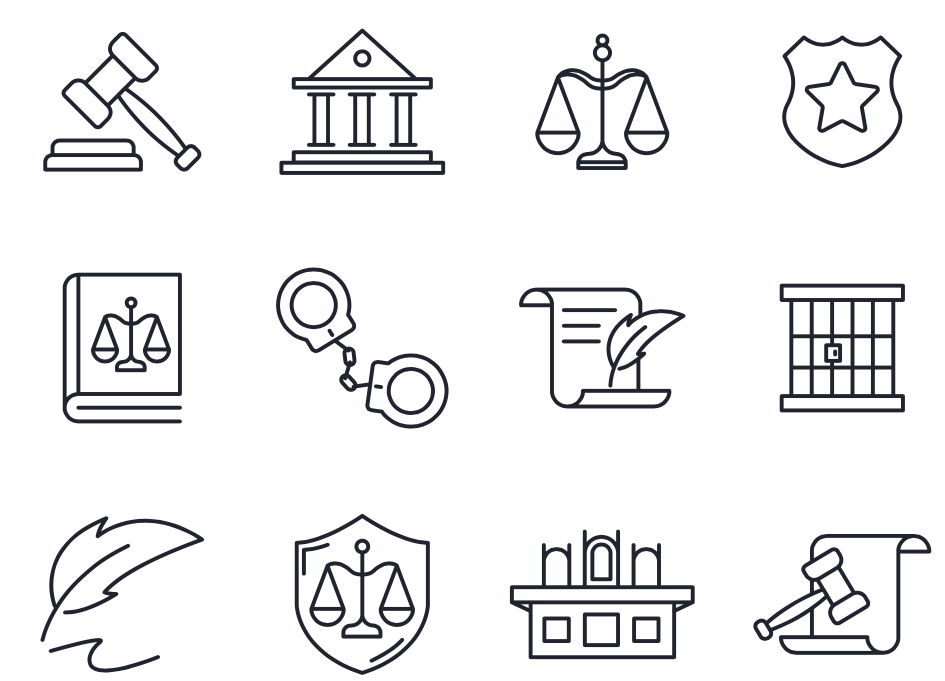

In [14]:
## Suppose we are only interested in the number of crimes per 1000 inhabitants,
# then we select these variables along with type of crime, region and year
crimes_1 = crime_table_1[['SoortMisdrijf', 'RegioS', 'Perioden', 'GeregistreerdeMisdrijvenPer1000Inw_3']].copy()
crimes_2 = crime_table_2[['SoortMisdrijf', 'RegioS', 'Perioden', 'GeregistreerdeMisdrijvenPer1000Inw_3']].copy()
print(crimes_1.shape)
print(crimes_2.shape)

(441000, 4)
(349800, 4)


In [15]:
# Explore periods available in each of the outcome tables
print(crimes_1['Perioden'].value_counts().sort_index())
print(crimes_2['Perioden'].value_counts().sort_index())

2010    36750
2011    36750
2012    36750
2013    36750
2014    36750
2015    36750
2016    36750
2017    36750
2018    36750
2019    36750
2020    36750
2021    36750
Name: Perioden, dtype: int64
2005    31800
2006    31800
2007    31800
2008    31800
2009    31800
2010    31800
2011    31800
2012    31800
2013    31800
2014    31800
2015    31800
Name: Perioden, dtype: int64


The outcome data needs to be merged and cleaned to be turned into something that we can work with. Right now, the data is in two tables, that might be different in the way in which they have been set up, there might be overlap in years, there are different regions

In [16]:
# We could take care of the overlap by only considering the years before 
# 2010 in the table containing the older data
crimes_2 = crimes_2.loc[crimes_2['Perioden'] < "2010"]  # using strings for the condition as 'Perioden' is a string var
crimes_2['Perioden'].value_counts().sort_index()

2005    31800
2006    31800
2007    31800
2008    31800
2009    31800
Name: Perioden, dtype: int64

In [17]:
## Crimes_1 and crimes_2 use different codings for classifying the type of crime (SoortMisdrijf).
# For this case study, we will try to predict the total number of crimes and leave aside the more specific
# types of crimes at the moment
crimes_1 = crimes_1.loc[crimes_1['SoortMisdrijf'] == 'Misdrijven, totaal']
crimes_2 = crimes_2.loc[crimes_2['SoortMisdrijf'] == 'Misdrijven, totaal']
print(crimes_1.shape)
print(crimes_2.shape)

(5880, 4)
(2120, 4)


In [18]:
### Now we merge the two files
crimes_1.info()
crimes_2.info()
crimes = pd.concat([crimes_1, crimes_2])
crimes.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5880 entries, 0 to 5879
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SoortMisdrijf                         5880 non-null   object 
 1   RegioS                                5880 non-null   object 
 2   Perioden                              5880 non-null   object 
 3   GeregistreerdeMisdrijvenPer1000Inw_3  4983 non-null   float64
dtypes: float64(1), object(3)
memory usage: 229.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2120 entries, 0 to 4657
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SoortMisdrijf                         2120 non-null   object 
 1   RegioS                                2120 non-null   object 
 2   Perioden                              2120 non-null   objec

(8000, 4)

In [19]:
# ... convert Perioden to an integer variable
crimes['Perioden'] = crimes['Perioden'].astype(str).astype(int)

In [20]:
# ... get rid of the 'Type of Crime' variable, which is now always consisting of 'Crimes, total'
crimes = crimes[['RegioS', 'Perioden', 'GeregistreerdeMisdrijvenPer1000Inw_3']]

In [21]:
# ... sort the dataframe over Region and Period
crimes = crimes.sort_values(['RegioS', 'Perioden'])

In [22]:
# ... and rename the columns
crimes.rename(
    columns={'RegioS': 'Region', 'Perioden': 'Year', 'GeregistreerdeMisdrijvenPer1000Inw_3': 'Crimes_per_1000'},
    inplace=True)

In [23]:
# ... after which we have our prepared outcome data
crimes.info()
crimes.head(30)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 1529 to 803
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           8000 non-null   object 
 1   Year             8000 non-null   int64  
 2   Crimes_per_1000  7094 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 250.0+ KB


,Region,Year,Crimes_per_1000
1529,'s-Gravenhage (gemeente),2005,115.3
1530,'s-Gravenhage (gemeente),2006,108.3
1531,'s-Gravenhage (gemeente),2007,117.4
1532,'s-Gravenhage (gemeente),2008,117.1
1533,'s-Gravenhage (gemeente),2009,115.7
1908,'s-Gravenhage (gemeente),2010,118.9
1909,'s-Gravenhage (gemeente),2011,115.2
1910,'s-Gravenhage (gemeente),2012,106.5
1911,'s-Gravenhage (gemeente),2013,101.6
1912,'s-Gravenhage (gemeente),2014,97.0


Now we are ready to explore the outcome data.

In [25]:
# module used for visualization
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Crime Rate Distribution')

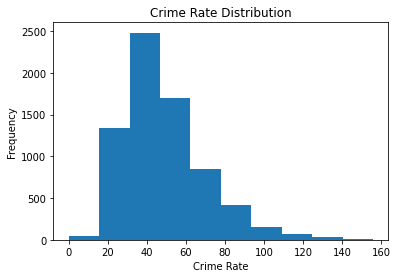

In [26]:
### explore outcome variable
# explore distribution
plt.hist(crimes['Crimes_per_1000'])
plt.xlabel('Crime Rate')
plt.ylabel('Frequency')
plt.title('Crime Rate Distribution')

In [27]:
# explore descriptive statistics
crimes['Crimes_per_1000'].describe()

count    7094.000000
mean       48.588145
std        20.842807
min         0.000000
25%        33.600000
50%        44.500000
75%        59.100000
max       155.700000
Name: Crimes_per_1000, dtype: float64

In [28]:
sum(crimes['Crimes_per_1000'].isnull())

906

In [30]:
# let's explore variation within and across regions
crimes['overall_mean'] = crimes['Crimes_per_1000'].mean()
crimes['region_mean'] = crimes['Crimes_per_1000'].groupby(crimes['Region']).transform('mean')

crimes['diff_within_region'] = crimes['Crimes_per_1000'] - crimes['region_mean']
crimes['diff_across_region'] = crimes['region_mean'] - crimes['overall_mean']

Text(0.5, 1.0, 'Difference within Regions')

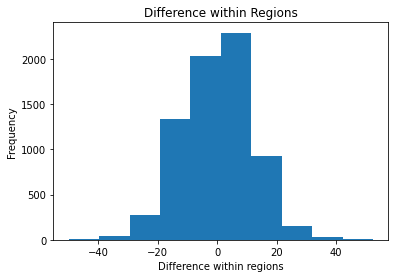

In [31]:
# variation within regions
plt.hist(crimes['diff_within_region'])
plt.xlabel('Difference within regions')
plt.ylabel('Frequency')
plt.title('Difference within Regions')

In [32]:
# explore descriptive statistics
crimes['diff_within_region'].describe()

count    7.094000e+03
mean    -2.253624e-17
std      1.171973e+01
min     -4.988824e+01
25%     -8.439706e+00
50%      4.970588e-01
75%      8.033824e+00
max      5.234706e+01
Name: diff_within_region, dtype: float64

Text(0.5, 1.0, 'Difference across Regions')

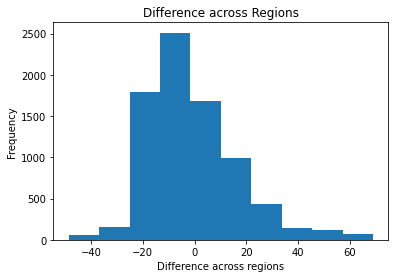

In [33]:
# variation between regions
plt.hist(crimes['diff_across_region'])
plt.xlabel('Difference across regions')
plt.ylabel('Frequency')
plt.title('Difference across Regions')

In [34]:
# explore descriptive statistics
crimes['diff_across_region'].describe()

count    7971.000000
mean       -1.000048
std        17.507414
min       -48.588145
25%       -13.509573
50%        -3.676380
75%         7.043105
max        68.900090
Name: diff_across_region, dtype: float64

In [35]:
### for the time trend in crime rates, we plot the average crime_rate over the Years
crime_trend = crimes.groupby('Year')['Crimes_per_1000'].mean()

Text(0.5, 1.0, 'Trend in Crime Rates')

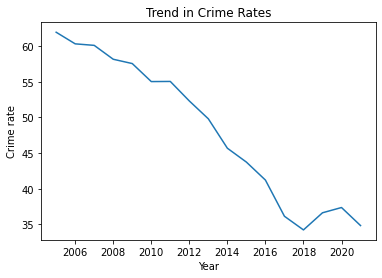

In [36]:
plt.plot(crime_trend)
plt.xlabel('Year')
plt.ylabel('Crime rate')
plt.title('Trend in Crime Rates')

## Conclusion
We see that there is variation in the outcome, meaning that there is something to predict in the first place

We see that we need to take into account Region in our models (or information related to Region), as Regions differ from each other in terms of crime_rate

We see that even after accounting for Region, there is still enough variability left within Regions

We see that we need to take Year / time-trends explicitly into account in our models

What do you conclude on the feasibility of this project?